In [67]:
from scipy.stats import t
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

# Guía 4

# 4.1

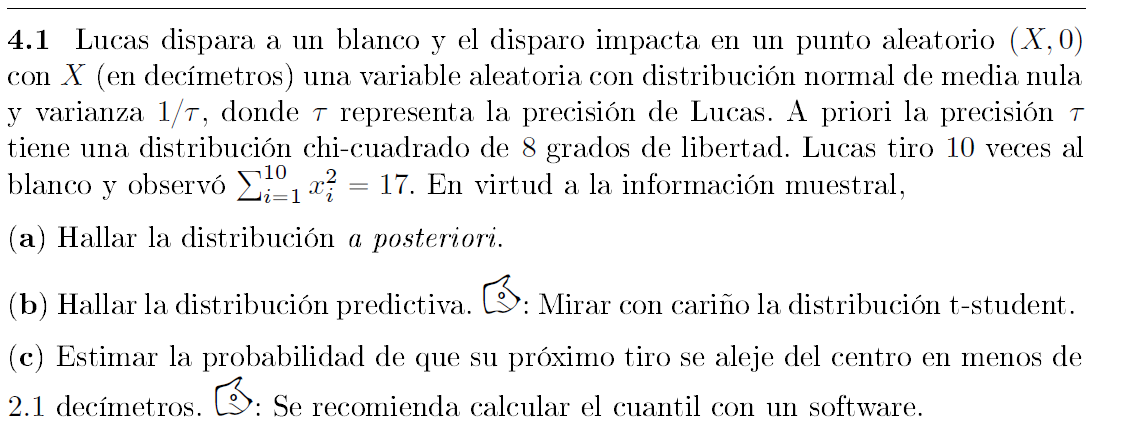

Precisión)- $\tau \sim \chi^2_8$

$X|_\tau \sim \mathcal{N}(0, \frac{1}{\tau})$

Disparo)- $D \sim \mathcal{U}(X, 0)$

Partiendo de la distribución condicional $X|_\tau$

$$p(x_i|\tau) = \frac{\sqrt{\tau}}{\sqrt{2\pi}}e^{-\frac{\tau}{2}x_i^2}$$

Y $p(\tau)$ por ser $\chi^2_8$

$$p(\tau) = \frac{1}{2^\frac{8}{2} \Gamma(\frac{8}{2})} \tau^{\frac{8}{2}-1} e^{-\frac{\tau}{2}} \hspace{5mm}\mathcal{1} \{\tau > 0 \}$$

Reemplazando numericamente ($\Gamma(4) = (4-1)! = 6$)

$$p(\tau) = \frac{1}{96} \tau^3 e^{-\frac{\tau}{2}} \hspace{5mm}\mathcal{1} \{\tau > 0 \}$$

Y aplicando inferencia Bayesiana:

$$p(\tau|D_n) \propto p(\tau) \prod_{i=1}^{n}p(x_i|\tau)$$


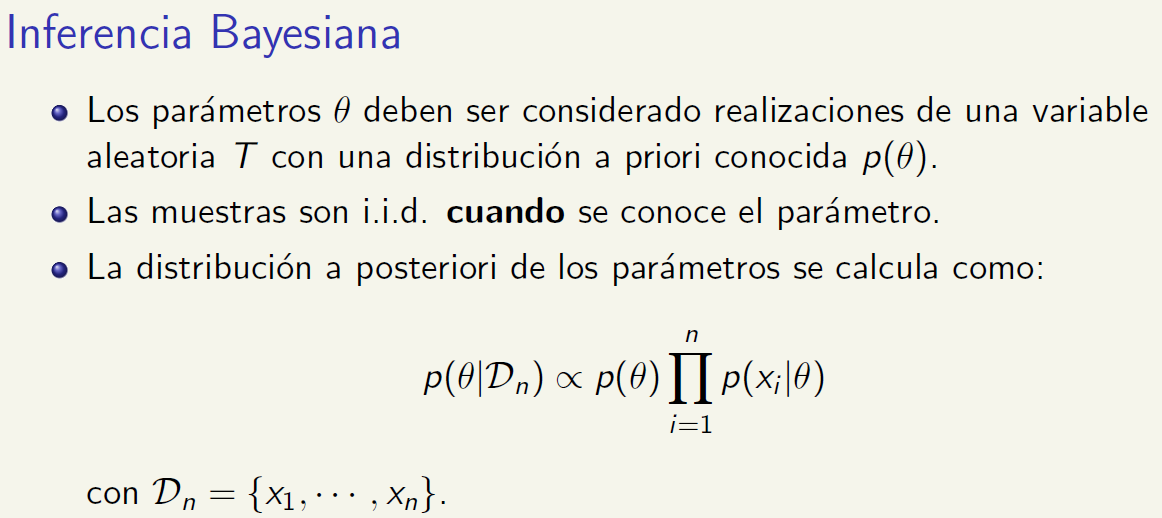

Desarrollo la productoria con el dato del enunciado $\sum_{i=1}^{10}x_i^2 = 17$. El término que acompaña a la exponencial termina elevandose a la $n/2$ (por ya tener raíz) y la exponencial termina teniendo la sumatoria que buscamos en su exponente.

$$\prod_{i=1}^{10} \frac{\sqrt{\tau}}{\sqrt{2\pi}}e^{-\frac{\tau}{2}x_i^2} = (\frac{\tau}{2\pi})^{\frac{n}{2}} e^{-(\frac{\sum_{i = 1}^{10}x_i^2}{2} \tau)} = (\frac{\tau}{2\pi})^5 e^{-(\frac{17}{2}\tau)} \hspace{5mm} \mathcal{1} \{\tau > 0 \}$$

Y sabiendo que $p(\tau) = \frac{1}{96} \tau^3 e^{-\frac{\tau}{2}} \hspace{5mm}\mathcal{1} \{\tau > 0 \}$ entonces

$$p(\tau|D_n) \propto \frac{1}{96} \tau^3 e^{-\frac{\tau}{2}} (\frac{\tau}{2\pi})^5 e^{-(\frac{17}{2}\tau)} = \frac{1}{96 (2\pi)^5}\tau^8 e^{-9\tau} = C \tau^8 e^{-9\tau} \hspace{5mm}\mathcal{1} \{\tau > 0 \}$$ 

que tiene la forma de una distribución Gamma de parámetros ($\nu = 9, \lambda = 9$)

- $\tau|D_n \sim \Gamma(\nu, \lambda)$
- $p(\tau|D_n) = \frac{9^9}{\Gamma(9)} \tau^8 e^{-9\tau}$



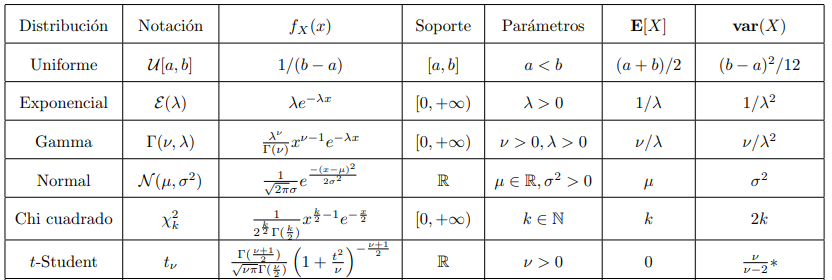

# Item 4.2

Hallar la distribución predictiva

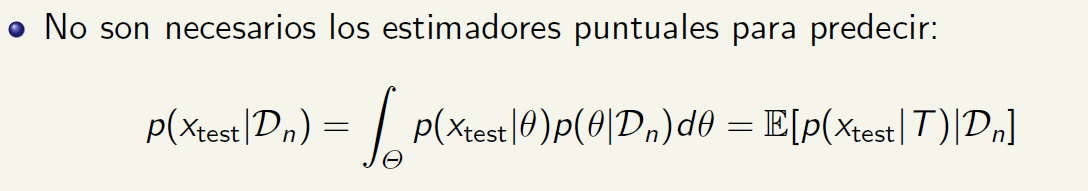

Planteo:

\begin{align*}
    p(x_{test}|D_n) &= \int_\tau p(x_{test}|\tau)p(\tau|D_n) d\tau\\

                    &= \int_0^{+\infty} (\frac{\tau}{2\pi})^{1/2} e^{\frac{\tau}{2}x^2_{test}} \frac{9^9}{\Gamma(9)}\tau^8 e^{-9\tau} d\tau\\

                    &= \int_0^{+\infty} \frac{9^9}{\sqrt{2\pi}\Gamma(9)} \tau^{\frac{17}{2}} e^{-(\frac{x^2_{test}}{2} + 9)\tau} d\tau
\end{align*}

Para que coincida el exponente del $\tau$ siendo $\frac{17}{2} + 1 = 9.5 = \nu$ y tomando el exponente de la exponencial se puede proponer una distribución $t \sim \Gamma (9.5, \frac{x^2_{test}}{2} + 9)$, por lo tanto planteamos:

$$f_T(t) = \frac{(\frac{x^2_{test}}{2} + 9)^{9.5}}{\Gamma(9.5)} t ^{9.5 - 1} e^{-(\frac{x^2_{test}}{2}+ 9)t}$$

Volviendo a la integral planteo los términos necesarios a añadir para que me quede la función de distribución a integrar dentro del soporte y que de esa forma me de igual a 1:

\begin{align*}
    p(x_{test}|D_n) &= \int_0^{+\infty} \frac{9^9}{\sqrt{2\pi}\Gamma(9)} \tau^{\frac{17}{2}} e^{-(\frac{x^2_{test}}{2} + 9)\tau} d\tau\\

                    &= \frac{9^9}{\sqrt{2\pi}\Gamma(9)} \frac{\Gamma(9.5)}{(\frac{x^2_{test}}{2} + 9)^{9.5}}
\end{align*}

Trato de llevar la expresión a la $t-Student$

\begin{align*}
                    &= \frac{9^9}{\sqrt{2\pi}\Gamma(9)} \frac{\Gamma(9.5)}{(\frac{x^2_{test}}{2} + 9)^{9.5}}\\

                    &= \frac{9^9}{\sqrt{2\pi}\Gamma(9)} \Gamma(\frac{18 + 1}{2})(\frac{x^2_{test}}{2} + 9)^{-\frac{18+1}{2}}\\

                    &= \frac{1}{\sqrt{2\pi}} 9^9 \frac{\Gamma(\frac{18 + 1}{2})}{\Gamma(\frac{18}{2})} (\frac{x^2_{test}}{2} + 9)^{-\frac{18+1}{2}}\\
\end{align*}

Saco factor común del paréntesis el 9

\begin{align*}
                    &= \frac{1}{\sqrt{2\pi}} 9^9 \frac{\Gamma(\frac{18 + 1}{2})}{\Gamma(\frac{18}{2})} (\frac{x^2_{test}}{18} + 1)^{-\frac{18+1}{2}} 9^{-(\frac{18+1}{2})}\\

                    &= \frac{1}{\sqrt{2\pi}} \frac{9^9}{9^{9.5}} \frac{\Gamma(\frac{18 + 1}{2})}{\Gamma(\frac{18}{2})} (\frac{x^2_{test}}{18} + 1)^{-\frac{18+1}{2}}\\

                    &= \frac{1}{\sqrt{2\pi}} \frac{1}{\sqrt{9}} \frac{\Gamma(\frac{18 + 1}{2})}{\Gamma(\frac{18}{2})} (\frac{x^2_{test}}{18} + 1)^{-\frac{18+1}{2}}\\

                    &= \frac{1}{\sqrt{18\pi}} \frac{\Gamma(\frac{18 + 1}{2})}{\Gamma(\frac{18}{2})} (\frac{x^2_{test}}{18} + 1)^{-\frac{18+1}{2}}\\
\end{align*}

Llegando a que

$$x_{test}|D_n \sim t_{18}$$

$$p(x_{test}|D_n) = \frac{1}{\sqrt{18\pi}} \frac{\Gamma(\frac{18 + 1}{2})}{\Gamma(\frac{18}{2})} (\frac{x^2_{test}}{18} + 1)^{-\frac{18+1}{2}}$$

# Item C

In [6]:
prob = t.cdf(2.1, 18) - t.cdf(-2.1, 18)

print("La probabilidad de que el tiro se aleje del centro en menos de 2.1 decímetros es de {:.4f}".format(prob))

La probabilidad de que el tiro se aleje del centro en menos de 2.1 decímetros es de 0.9499


# Ejercicio 4.2

# Item A

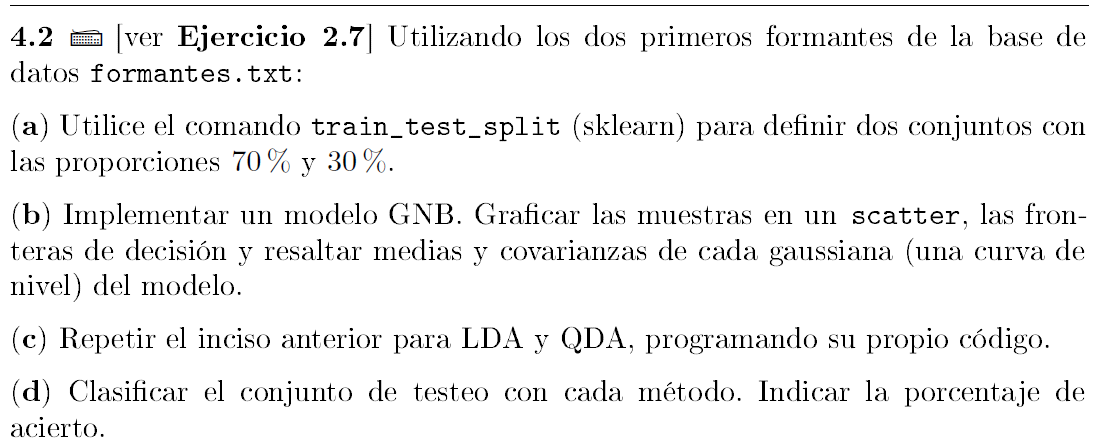

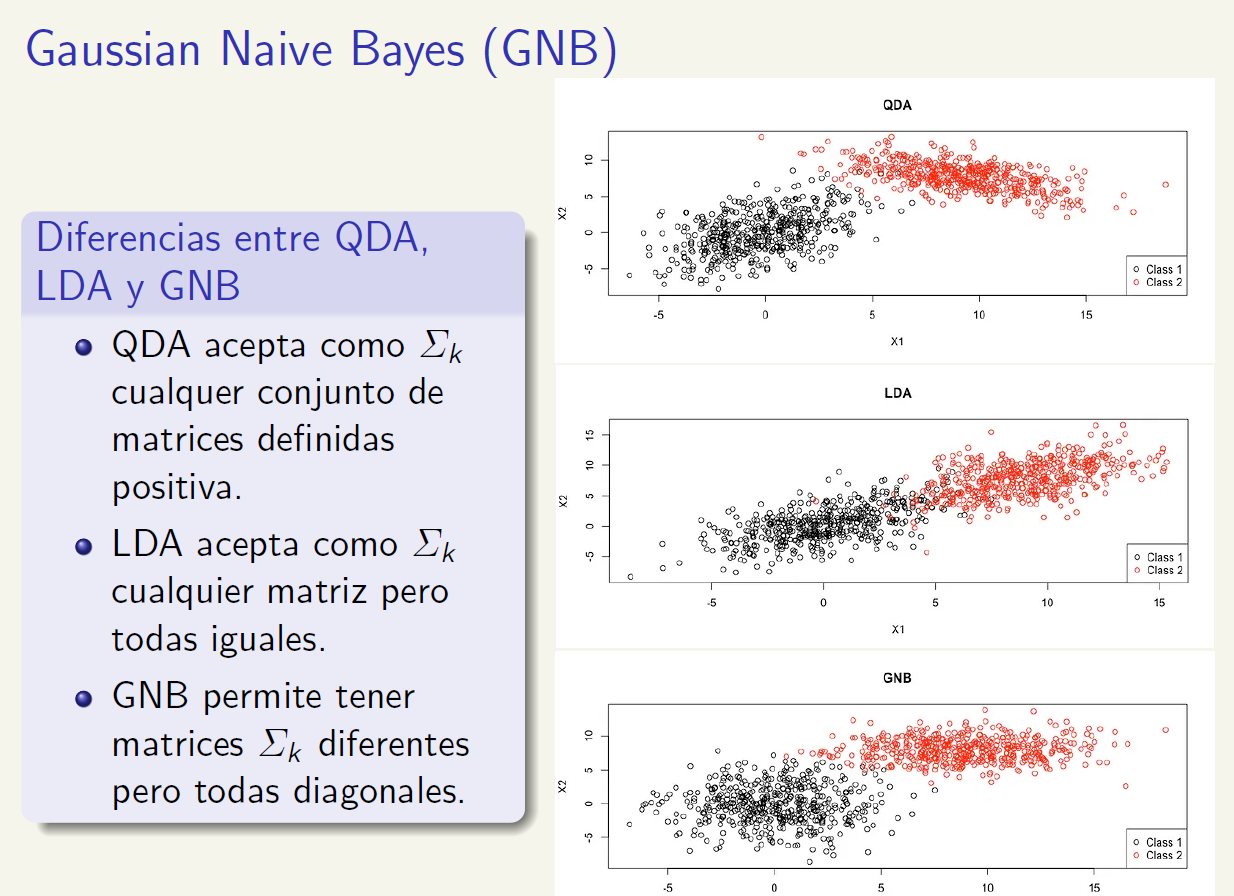

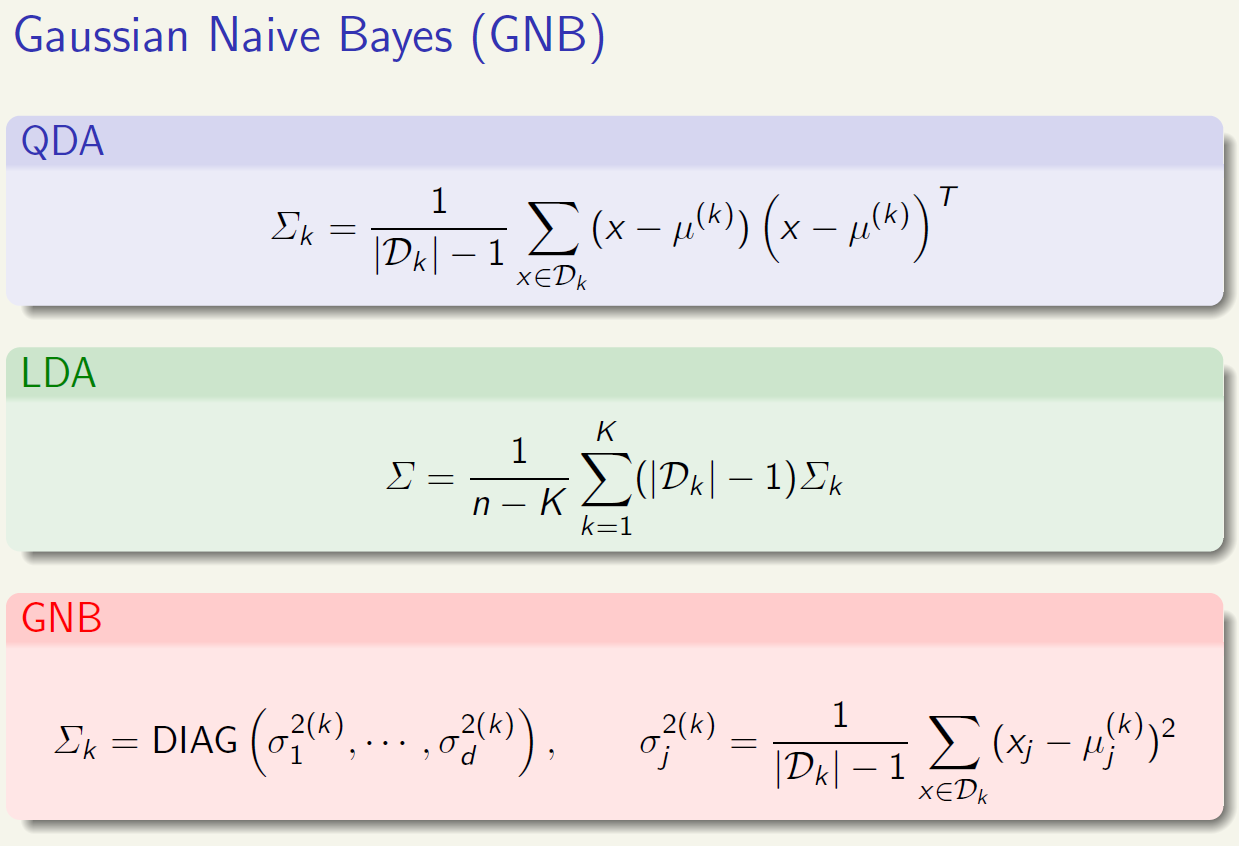

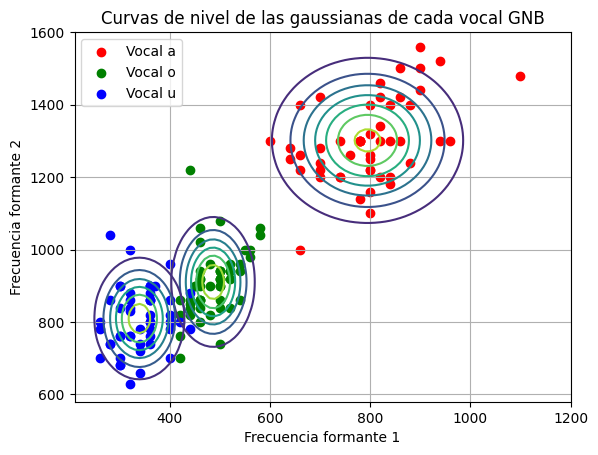

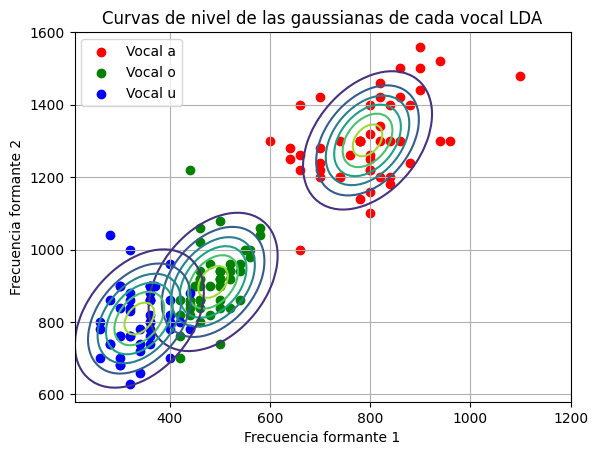

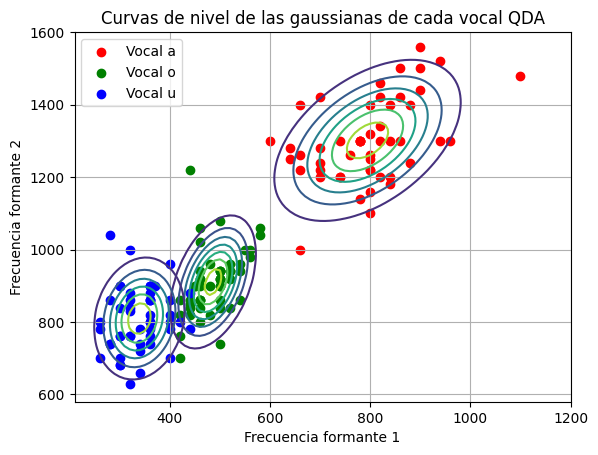

In [64]:
data = pd.read_csv('data/formantes.txt', sep='\t', header = None)

# Separo el conjunto en train 70% y test 30%
train_set, test_set = train_test_split(data, test_size=0.3)

test_labels = test_set.drop(columns=[0,1,2]).values # Me quedo solo con la etiqueta
test_set = test_set.drop(columns=[2, 3]).values # Me saco la formante 3 y la etiqueta


# Viene dado por 3 columnas que son las frecuencias de las formantes y la cuarta dice si la vocal es /a/ /o/ /u/
# Me separo las formantes por vocal y me quedo con las primeras 2 para graficarlas en 2D

formantes_a = data.loc[data[3] == 'a'].drop(columns=[2, 3])
formantes_a = formantes_a.values

formantes_o = data.loc[data[3] == 'o'].drop(columns=[2, 3])
formantes_o = formantes_o.values

formantes_u = data.loc[data[3] == 'u'].drop(columns=[2, 3])
formantes_u = formantes_u.values

n = len(data)
n_a = len(formantes_a)
n_o = len(formantes_o)
n_u = len(formantes_u)

# Calculo la media y la covarianza de cada formante
media_a = np.mean(formantes_a, axis=0)
media_o = np.mean(formantes_o, axis=0)
media_u = np.mean(formantes_u, axis=0)

# Sigma_QDA
sigma_a = np.cov(formantes_a, rowvar=False, bias = False)
sigma_o = np.cov(formantes_o, rowvar=False, bias = False)
sigma_u = np.cov(formantes_u, rowvar=False, bias = False)

# Sigma_LDA
sigma_LDA = 1 / (n - 3) * ((n_a - 1) * sigma_a + (n_o - 1) * sigma_o + (n_u - 1) * sigma_u)

# Sigma_GNB
diag_a = 1 / (n_a - 1) * (formantes_a - media_a).T @ (formantes_a - media_a)
diag_o = 1 / (n_o - 1) * (formantes_o - media_o).T @ (formantes_o - media_o)
diag_u = 1 / (n_u - 1) * (formantes_u - media_u).T @ (formantes_u - media_u)

sigma_GNB_a = np.diag(np.diag(diag_a))
sigma_GNB_o = np.diag(np.diag(diag_o))
sigma_GNB_u = np.diag(np.diag(diag_u))

# Obtengo las funciones de densidad de probabilidad de cada clase
pdf_a_LDA = multivariate_normal(mean = media_a.reshape(-1), cov = sigma_LDA)
pdf_o_LDA = multivariate_normal(mean = media_o.reshape(-1), cov = sigma_LDA)
pdf_u_LDA = multivariate_normal(mean = media_u.reshape(-1), cov = sigma_LDA)

pdf_a_GNB = multivariate_normal(mean = media_a.reshape(-1), cov = sigma_GNB_a)
pdf_o_GNB = multivariate_normal(mean = media_o.reshape(-1), cov = sigma_GNB_o)
pdf_u_GNB = multivariate_normal(mean = media_u.reshape(-1), cov = sigma_GNB_u)

pdf_a_QDA = multivariate_normal(mean = media_a.reshape(-1), cov = sigma_a)
pdf_o_QDA = multivariate_normal(mean = media_o.reshape(-1), cov = sigma_o)
pdf_u_QDA = multivariate_normal(mean = media_u.reshape(-1), cov = sigma_u)

# Grafico las curvas de nivel de las gaussianas
X = np.linspace(210, 1200, 100)
Y = np.linspace(580, 1600, 100)
X, Y = np.meshgrid(X, Y)
pos = np.dstack((X, Y))

# Densidad de probabilidad de cada punto
Z_a_GNB = pdf_a_GNB.pdf(pos)
Z_o_GNB = pdf_o_GNB.pdf(pos)
Z_u_GNB = pdf_u_GNB.pdf(pos)

plt.figure()
plt.contour(X, Y, Z_a_GNB)
plt.contour(X, Y, Z_o_GNB)
plt.contour(X, Y, Z_u_GNB)

plt.scatter(formantes_a[:,0], formantes_a[:,1], c='r', label='Vocal a')
plt.scatter(formantes_o[:,0], formantes_o[:,1], c='g', label='Vocal o')
plt.scatter(formantes_u[:,0], formantes_u[:,1], c='b', label='Vocal u')
plt.xlabel('Frecuencia formante 1')
plt.ylabel('Frecuencia formante 2')
plt.title('Curvas de nivel de las gaussianas de cada vocal GNB')
plt.legend()
plt.grid()
plt.show()

Z_a_LDA = pdf_a_LDA.pdf(pos)
Z_o_LDA = pdf_o_LDA.pdf(pos)
Z_u_LDA = pdf_u_LDA.pdf(pos)

plt.figure()
plt.contour(X, Y, Z_a_LDA)
plt.contour(X, Y, Z_o_LDA)
plt.contour(X, Y, Z_u_LDA)

plt.scatter(formantes_a[:,0], formantes_a[:,1], c='r', label='Vocal a')
plt.scatter(formantes_o[:,0], formantes_o[:,1], c='g', label='Vocal o')
plt.scatter(formantes_u[:,0], formantes_u[:,1], c='b', label='Vocal u')
plt.xlabel('Frecuencia formante 1')
plt.ylabel('Frecuencia formante 2')
plt.title('Curvas de nivel de las gaussianas de cada vocal LDA')
plt.legend()
plt.grid()
plt.show()


Z_a_QDA = pdf_a_QDA.pdf(pos)
Z_o_QDA = pdf_o_QDA.pdf(pos)
Z_u_QDA = pdf_u_QDA.pdf(pos)

plt.figure()
plt.contour(X, Y, Z_a_QDA)
plt.contour(X, Y, Z_o_QDA)
plt.contour(X, Y, Z_u_QDA)

plt.scatter(formantes_a[:,0], formantes_a[:,1], c='r', label='Vocal a')
plt.scatter(formantes_o[:,0], formantes_o[:,1], c='g', label='Vocal o')
plt.scatter(formantes_u[:,0], formantes_u[:,1], c='b', label='Vocal u')
plt.xlabel('Frecuencia formante 1')
plt.ylabel('Frecuencia formante 2')
plt.title('Curvas de nivel de las gaussianas de cada vocal QDA')
plt.legend()
plt.grid()
plt.show()


# Item D

In [65]:
def clasificar(x, medias_vec, sigma, len_vec, n, algoritmo, clases = 3):
    len_test = len(x)
    args = np.zeros((len_test, clases))
    
    if algoritmo == 'LDA':
        print(algoritmo)
        # Calculo los pesos
        w_a = np.linalg.inv(sigma[0]) @ medias_vec[0].T
        w_o = np.linalg.inv(sigma[1]) @ medias_vec[1].T
        w_u = np.linalg.inv(sigma[2]) @ medias_vec[2].T
        
        b_a = -0.5 * medias_vec[0] @ np.linalg.inv(sigma[0]) @ medias_vec[0].T + np.log(len_vec[0] / n)
        b_o = -0.5 * medias_vec[1] @ np.linalg.inv(sigma[1]) @ medias_vec[1].T + np.log(len_vec[1] / n)
        b_u = -0.5 * medias_vec[2] @ np.linalg.inv(sigma[2]) @ medias_vec[2].T + np.log(len_vec[2] / n)
        
        for i in range(len_test):
            args[i, 0] = x[i] @ w_a + b_a
            args[i, 1] = x[i] @ w_o + b_o
            args[i, 2] = x[i] @ w_u + b_u
    
    # Si es QDA o GNB
    else:
        for i in range(len_test):
            args[i, 0] = -0.5 * (x[i, :] - medias_vec[0]) @ np.linalg.inv(sigma[0]) @ (x[i, :] - medias_vec[0]).T + np.log(len_vec[0] / n) - np.log(np.linalg.det(sigma[0])) / 2
            args[i, 1] = -0.5 * (x[i, :] - medias_vec[1]) @ np.linalg.inv(sigma[1]) @ (x[i, :] - medias_vec[1]).T + np.log(len_vec[1] / n) - np.log(np.linalg.det(sigma[1])) / 2
            args[i, 2] = -0.5 * (x[i, :] - medias_vec[2]) @ np.linalg.inv(sigma[2]) @ (x[i, :] - medias_vec[2]).T + np.log(len_vec[2] / n) - np.log(np.linalg.det(sigma[2])) / 2
        
    return np.argmax(args, axis=1)
    

medias_vec = np.array([media_a, media_o, media_u])
len_vec = np.array([n_a, n_o, n_u])

sigmas_LDA = np.array([sigma_LDA, sigma_LDA, sigma_LDA])
sigmas_GNB = np.array([sigma_GNB_a, sigma_GNB_o, sigma_GNB_u])
sigmas_QDA = np.array([sigma_a, sigma_o, sigma_u])

test_labels_num = [0 if char == 'a' else 1 if char == 'o' else 2 for char in test_labels]

print("Probabilidad de error para algoritmo LDA = ", 1 - accuracy_score(test_labels_num, clasificar(test_set, medias_vec, sigmas_LDA, len_vec, n, 'LDA')))
print("Probabilidad de error para algoritmo GNB = ", 1 - accuracy_score(test_labels_num, clasificar(test_set, medias_vec, sigmas_GNB, len_vec, n, 'GNB')))
print("Probabilidad de error para algoritmo QDA = ", 1 - accuracy_score(test_labels_num, clasificar(test_set, medias_vec, sigmas_QDA, len_vec, n, 'QDA')))


LDA
Probabilidad de error para algoritmo LDA =  0.022222222222222254
Probabilidad de error para algoritmo GNB =  0.0888888888888889
Probabilidad de error para algoritmo QDA =  0.022222222222222254


# Ejercicio 4.3

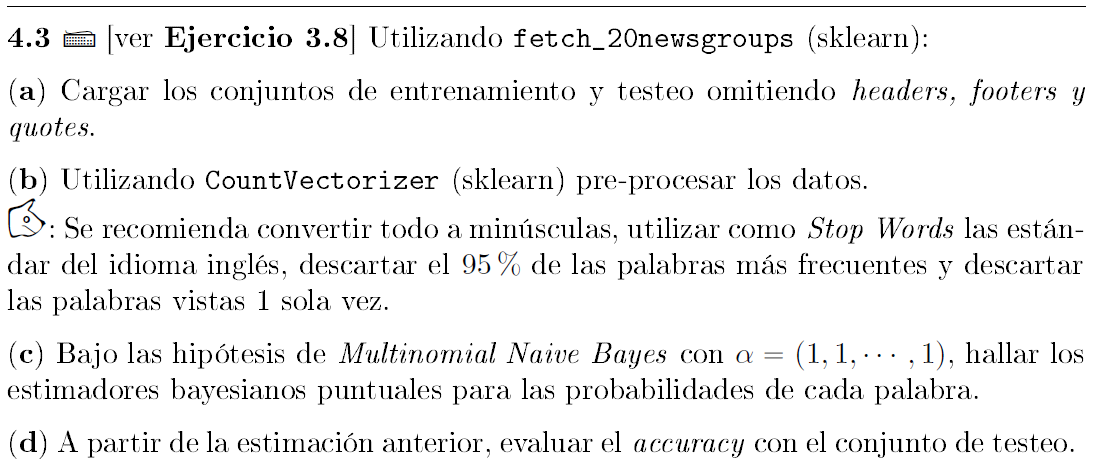

# CountVectorizer

El CountVectorizer de scikit-learn es una herramienta utilizada para convertir una colección de textos en una matriz de características numéricas, donde cada fila representa un documento y cada columna representa una palabra (o un n-grama) en el vocabulario. En otras palabras, convierte un texto en una representación de frecuencia de palabras.

Funcionamiento de CountVectorizer:
El principal propósito de CountVectorizer es realizar un análisis de texto y crear una matriz de términos. Cada valor en la matriz indica la cantidad de veces que una palabra aparece en un documento.

Características Principales:

- Tokenización: CountVectorizer divide el texto en palabras (tokens) según una estrategia de tokenización (por defecto, divide por espacios y puntuación).
- Vocabulario: Se construye un vocabulario que contiene todas las palabras únicas que aparecen en los documentos proporcionados.
- Frecuencia de Palabras: Cuenta las ocurrencias de cada palabra en cada documento


## Pasos que realiza CountVectorizer:

### 1- Ajuste del modelo:

Primero, CountVectorizer construye un vocabulario a partir de los documentos proporcionados. Este vocabulario incluye todas las palabras únicas que aparecen en los documentos.
Puedes personalizar la tokenización, como filtrar palabras muy comunes (stopwords), limitar el análisis a solo palabras alfabéticas, entre otros.

### 2- Transformación:

Después de ajustar el modelo al conjunto de datos, fit_transform() convierte el texto en una matriz dispersa, donde las filas corresponden a los documentos y las columnas a las palabras del vocabulario.
Cada valor en la matriz representa la cantidad de veces que una palabra (columna) aparece en un documento (fila).


## Argumentos Comunes de CountVectorizer:

- stop_words: Puedes eliminar palabras muy comunes (por ejemplo, "el", "de", "a") que no aportan mucha información al modelo.
- ngram_range: Permite especificar el rango de n-gramas a considerar (por ejemplo, pares de palabras o trios de palabras).
- max_features: Limita el número de características (palabras) que se extraen. Si se establece, solo se seleccionan las max_features más frecuentes.


# Multinomial Naive Bayes

El Multinomial Naive Bayes (MNB) es una variante del algoritmo de Naive Bayes, utilizado principalmente para clasificación de texto, donde las características son representadas como la frecuencia de aparición de palabras en los documentos. Se basa en el modelo de probabilidad multinomial para modelar la distribución de las características (las palabras en el texto).

# ¿Para qué se usa el Multinomial Naive Bayes?
El Multinomial Naive Bayes es especialmente popular para problemas de clasificación de texto, ya que es muy eficiente y fácil de implementar. Algunos de los casos de uso más comunes incluyen:

### 1- Clasificación de Texto:

- Spam detection: Detectar si un correo electrónico es spam o no.
- Análisis de Sentimientos: Clasificar el sentimiento de un texto como positivo, negativo o neutral.
- Clasificación de Noticias: Clasificar artículos de noticias en diferentes categorías (deportes, política, entretenimiento, etc.).

### 2- Filtrado de contenido 

Se puede usar para filtrar textos en base a categorías predefinidas.

### 3- Sistemas de recomendación

Usado en sistemas de recomendación de contenido textual, como sugerencias de artículos o productos basados en descripciones.

### 4- Clasificación de Documentos

En aplicaciones donde el objetivo es organizar grandes volúmenes de texto, como en bibliotecas o bases de datos.

Yendo al caso de predicción de palabras en documentos:

$$Y \sim \text{Cat}({c_1, ..., c_k})$$
$$X_j | Y = k \sim \text{Cat} ({\theta_1^{(k)}}, ..., \theta_V^{(k)})$$

- $X_j | Y = k$ representando a la palabra $j$ dado el documento de clase $k$
- $\theta_i^{(k)}$ con $i = 1, ..., V$ representando a la probabilidad de la palabra $i-ésima$ para la posición $j$ y clase $k$

### Sobre las variables contadores

Sea $\mathbf{N} = (N_1, ..., N_V)$, es sencillo notar que $\sum_{m=1}^V N_m = d$ y $\mathbf{N}|_{Y=k} \sim \mathcal{M}(d, [\theta^{(k)}_1, ..., \theta^{(k)}_V])$

- $N_m|Y=k$ es la cantidad de palabras con valor $m$ en un texto de clase $k$
- $d$ es la cantidad de palabras totales en un documento$

### Probabilidades de Clases
Los parámetros $c_1, ..., c_k$ son estimados por máxima verosimilitud como:

$$\hat{c}_k = \frac{\#\{y_i = k\}}{n}$$


### Estimación de $\theta_m^{k}$
Se cuenta con datos \{(\mathbf{N}_i, y_i)\}^n_{i=1}. Sin embargo, para cada clase $k$ se utilizarán los datos con ${y_i = k}$ distribuidos como una multinomial de probabilidades $\theta_1^{(k)}, ..., \theta_V^{(k)}$. A su vez, dado que las variables $N_m$ cuentan ocurrencias, puedo compactar todas las muestras de entrenamiento de cada clase en una sola (suficiencia estadística).

$$Ñ_m^{(k)} = \sum_{i=1}^n N_{i,m} \cdot \hspace{2mm} \mathcal{1}\{y_i = k\}$$

- $N_{i, m} representa la cantidad de veces que la palabra $m$ aparece en el documento $i$
- La indicadora genera que solo se sumen los documentos pertenecientes a la clase $k$
- $Ñ_m^{(k)}$ es el resultado de la suma de TODAS las ocurrencias de la palabra $m$ a lo largo de las muestras de la clase $k$

### Modelado: Estimador Bayesiano
Como modelado para el entrenamiento se supone $\mathbf{T} \sim \text{Dir}([\alpha_1, ... \alpha_V])$ y $(Ñ_1^{(k)}, ..., Ñ_V^{(k)})|_{\mathbf{T}=\Theta} \sim \mathcal{M}_n (\~{d}^{(k)}, [\theta_1^{(k)}, ..., \theta_V^{(k)}])$

- Siendo $T = (T_1, ..., T_V) \sim \text{Dir}([\alpha_1, ..., \alpha_V])$
- $\~{d}^{(k)}$ el número total de observaciones de la clase $k$

### Distribución a Posteriori
Desarrollando la misma $p(\theta_1^{(k)}, ..., \theta_V^{(k)}|Ñ_1^{(k)}, ..., Ñ_V^{(k)})$ se obtiene que

$$\mathbf{T}|_{Ñ_1^{(k)}, ..., Ñ_V^{(k)}} \sim \text{Dir}([Ñ_1^{(k)} + \alpha_1, ..., Ñ_V^{(k)} + \alpha_V])$$

### Estimador Bayesiano

$$\hat{\theta}_m^{(k)} = \mathcal{E}[T_m|Ñ_1^{(k)}, ..., Ñ_V^{(k)}] = \frac{Ñ_m^{(k)} + \alpha_m}{\sum_{\eta=1}^V Ñ_\eta^{(k)} + \alpha_\eta}$$

Siendo:
- $\hat{\theta}_m^{(k)}  = \frac{Ñ_m^{(k)} + \alpha_m}{\sum_{\eta=1}^V Ñ_\eta^{(k)} + \alpha_\eta}$ la probabilidad estimada de la palabra $m$ en la clase $k$
- $Ñ_m^{(k)} = \sum_{i=1}^n N_{i,m} \cdot \hspace{2mm} \mathcal{1}\{y_i = k\}$ la frecuencia de la palabra $m$ en todos los documentos de la clase $k$
- $N_m$ la cantidad de predictores con valor $m$
- $N_{i,m}$ la cantidad de veces que la palabra $m$ aparece en el documento $i$
- $\alpha_m$ el suavizado para la palabra $m$
- $V$ el tamaño del vocabulario (cantidad de palabras distintas)



In [70]:
from sklearn.datasets import fetch_20newsgroups

train_data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'qoutes'))
test_data = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'qoutes'))

# CountVectorizer: convierte una colección de documentos de texto en una matriz de conteo de tokens (frecuencias de palabras)
# stop_words='english': Esto usa las stopwords estándar en inglés, que son un conjunto predefinido de palabras comunes que se suelen descartar, como "the", "and", "is", etc.
# max_df=0.95: Esto descarta las palabras que aparecen en el 95% de los documentos más frecuentes. Es útil para eliminar palabras demasiado comunes que no aportan información significativa.
# min_df=2: Esto asegura que se descarten las palabras que aparecen en solo un documento (aparecen una vez). Es útil para eliminar palabras poco frecuentes que podrían ser ruidosas.
# https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer

vectorizer = CountVectorizer(lowercase=True, stop_words='english', max_df=0.95, min_df=2)
X_train = vectorizer.fit_transform(train_data.data) # Ajusta el vectorizador y lo transforma en una matriz de conteo de tokens
X_test = vectorizer.transform(test_data.data) # Transforma los datos de test en una matriz de conteo de tokens

# Clasificador Naive Bayes
y_train = train_data.target # Etiquetas de entrenamiento
y_test = test_data.target # Etiquetas de test

n_palabras = X_train.shape[1] # Cantidad de palabras
n_clases = len(np.unique(y_train)) # Cantidad de clases

N = np.zeros((n_clases, n_palabras)) # Matriz de palabras
alpha = np.ones(n_palabras) # Parámetro de suavizado (todo en 1 por enunciado)

# Cuento la cantidad de palabras por clase
for i in range(n_clases):
    clases_index = np.where(y_train == i)[0] # Indices de las clases
    N[i, :] = X_train[clases_index, :].sum(axis=0) # Sumo la frecuencia de palabras en el documento de lase i
    
theta = (N + alpha) / (N.sum(axis=1).reshape(-1, 1) + alpha.sum()) # Calculo la probabilidad de cada palabra por clase

[[2.57479788e-05 3.00393086e-04 8.58265959e-06 ... 8.58265959e-06
  8.58265959e-06 8.58265959e-06]
 [2.74403629e-04 1.37201815e-04 9.14678765e-06 ... 9.14678765e-06
  9.14678765e-06 9.14678765e-06]
 [1.35276663e-04 2.61825799e-05 4.36376331e-06 ... 8.29115029e-05
  4.36376331e-06 4.36376331e-06]
 ...
 [4.74876087e-05 1.04472739e-03 1.18719022e-05 ... 5.93595109e-06
  5.93595109e-06 5.93595109e-06]
 [1.73814800e-04 4.20052434e-04 7.24228335e-06 ... 7.24228335e-06
  7.24228335e-06 7.24228335e-06]
 [3.91504355e-05 1.66389351e-04 9.78760889e-06 ... 9.78760889e-06
  9.78760889e-06 9.78760889e-06]]


# Item D

In [71]:
c_k = np.bincount(y_train)/len(y_train)
y_pred = np.argmax(np.log(c_k).reshape(-1, 1) + np.log(theta) @ X_test.T, axis=0)

accuracy_score(y_test, y_pred)

print("La precisión del clasificador Naive Bayes es de {:.4f}".format(accuracy_score(y_test, y_pred)))

La precisión del clasificador Naive Bayes es de 0.7558
